# Africa : It's time for you to SHINE !
*** 
**Mhamed Jabri — 11/30/2018**

Couple of months ago, I attended an event that left a profound impression on me : **Deep Learning Indaba**'s second edition that took place in South Africa. Ever since, I was wondering what would be the best way for me to share that experience and share my thoughts about the state of AI in Africa in general in order to : 
1. Reach out to Africans, especially students like me, who have their doubts, struggle to fit and show them that they're far from being alone in their quest.
2. Reach out to the rest of the world and raise awareness of the potential in Africa and the importance of its inclusion in research and in representation.

Medium has been THE to-go place for such blogs but this survey  gave me an original and fun way to tell my story. 

In this notebook, I will be talking about **AI in Africa**. More specifically, I will talk about the main efforts that are being done to help close the gap and promote AI (Deep Learning Indaba, Black in AI, new google research lab in Ghana...) and while doing that, I'll be using some extracts from the Kaggle Survey that will shed more lights on this matter.

# Table of contents
***

* [Deep Learning Indaba ](#introduction)

* [1. African demographics](#demographics)
   * [1.1. Gender](#gender)
   * [1.2. Age](#age)

* [2. African students in ML](#education)
   * [2.1. Highest level of education](#highest)
   * [2.2. Platforms used for learning](#online)
   * [2.3. AMMI :  African Master of Machine Intelligence](#ammi)
   
* [3. ML at work in Africa](#pro)
   * [3.1. Years of experience in ML](#experience)
   * [3.2 Industries affected by ML](#industry)
   * [3.3. Say hello to Google AI Accra](#google)

* [Conclusion](#conclusion)

* [References](#references)

# Deep Learning Indaba ?
<a id="introduction"></a>
*** 

![DLindaba](https://pbs.twimg.com/media/Dor2BYoXsAITCho.jpg)

I said that attending Deep Learning Indaba made me want to do this work so I figured that I might as well introduce it properly since I'll be making some references to the event through my notebook.  

Deep Learning Indaba is, mainly, a week-long conference which aims is to strengthen machine learning in Africa through state-of-the-art teaching and networking in a very inclusive and diverse environment. Throught its speakers and poster sessions, it also provides a platform to highlight the unbelievable achievements of African researchers / students / startups.

More than 500 Africans gathered for the second edition of this event. As for the speakers, we were served by *La creme de la creme* : Moustapha Cisse, Timnit Gebru, Nando De Freitas, Jeff Dean and many other big names were there to inspire and empower the community.    

On a personnal note, not only did I have the great honour of talking to world-renowned scientists of our field, especially those who are born, raised and educated in Africa, but I also had the pleasure of exchanging with peers I so rarely meet and discuss their posters that was showcasing the amazing research work that African universities have been able to deliver as of late [1].

You can find some blog posts where attendants talk in more details about their experiences there and why the enjoyed it [2].

# 1. African Demographics
<a id="demographics"></a>
***
On the next section, I'll start using the results of the Kaggle survey and the first stop shall be the demographics of the African Community and what it means from a potential perspective.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

schema = pd.read_csv('../input/SurveySchema.csv')
df = pd.read_csv('../input/multipleChoiceResponses.csv', low_memory=False)

african_countries_survey = ['Morocco','Tunisia','Kenya','Egypt','South Africa','Nigeria']

df_afr = df[df['Q3'].isin(african_countries_survey )]
df_restworld = df[~df['Q3'].isin(african_countries_survey )]
df['Zone']=["Africa" if x in african_countries_survey else "RoW" for x in df['Q3']]

class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

## Gender
<a id="gender"></a>


In [2]:
df_afr.Q1.value_counts()/df_afr.Q1.value_counts().cumsum()[-1]

tmp = df_afr.Q1.value_counts()
labels = (np.array(tmp.index))
sizes = (np.array((tmp / tmp.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender of African Kagglers respondents'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Gender")

No surprises here (unfortunately) : Males are still too dominant. That being said, this is not specific to Africa but rather to the world, according to this survey's results (ratio of 80/20 found for the rest of the world).    

During Deep Learning Indaba, inclusiveness and parity were very important to the organizers. A special event "Women in ML" was organized by Microsoft in order to encourage, support and unite women in machine learning, while highlighting diverse career paths: from academia, to industrial research, to applied machine learning, and start-ups. 

I think that similar efforts are a great way to help women thrive and feel empowered in a field that is so dominated by the male presence.

## Age
<a id="age"></a>

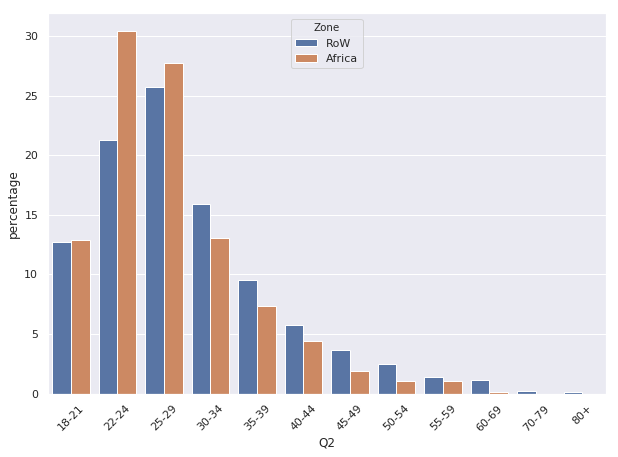

In [3]:
Age = (df.groupby(['Zone'])['Q2']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q2'))

plt.figure(figsize=(10,7))
p = sns.barplot(x="Q2", y="percentage", hue="Zone", data=Age[:-1])
_ = plt.setp(p.get_xticklabels(), rotation=45)  # Rotate labels


We notice that most of the African respondents are between 22 and 24 while the majority for the rest of the world falls under the 25-29 category.                                        
Noticing this trend, it made me think about an important point : **The youth of Africa**.       
Here's an anecdote that's been told to me : Moustapha Cisse, who's 33 and is from Senegal, is older than 70% of the population of Senegal. Kyunghyun Cho, who's 34 and is from Korea, is younger over 70% of the population in Korea [3].                          
In fact, to give you a more general view, **the median age in Africa is 19; in the European Union, 43.** Yep, the difference is that huge and the margin of progress is that big for Africa.

# 2. African students in ML
<a id="education"></a>
***
Next up : AI and Africa from an academic perspective. We'll see what's the highest degree obtained by african respondents, analyze their use of the online resources and most importantly, talk about the **African Master of Machine Intelligence**.

## Highest education level
<a id="highest"></a>

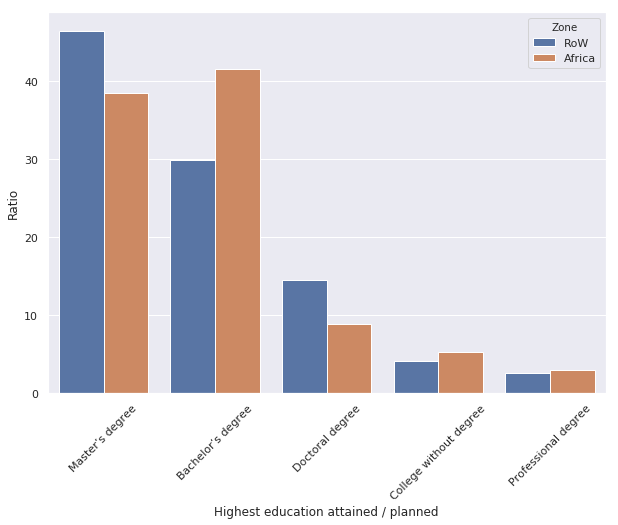

In [4]:
education = (df.groupby(['Zone'])['Q4']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
education.Q4.replace(to_replace={"Some college/university study without earning a bachelor’s degree":"College without degree"}, 
                     inplace=True)
education.rename(columns={"Q4": "Highest education attained / planned"}, inplace=True)


plt.figure(figsize=(10,7))

p = sns.barplot(x="Highest education attained / planned", y="Ratio", hue="Zone", data=education[:10])
_ = plt.setp(p.get_xticklabels(), rotation=45)


#story about new master

We notice here that most respondents from Africa stopped after getting a Bachelor while most respondents from the rest of the world hold a master's degree. That can be explained by two factors : 
* 1. As seen before, respondents from Africa are younger on average than respondents from the rest of the world. This means that maybe they pursue their studies and obtain their masters at a further point in time.
* 2. In many countries in Africa, the children have to start providing financilly sooner rather than later. This means that if they find a job straight after their bachelor's degree, then they will probably take it if they need to help their parents financilly or at least relieve the burden.

Let's break this by gender : 

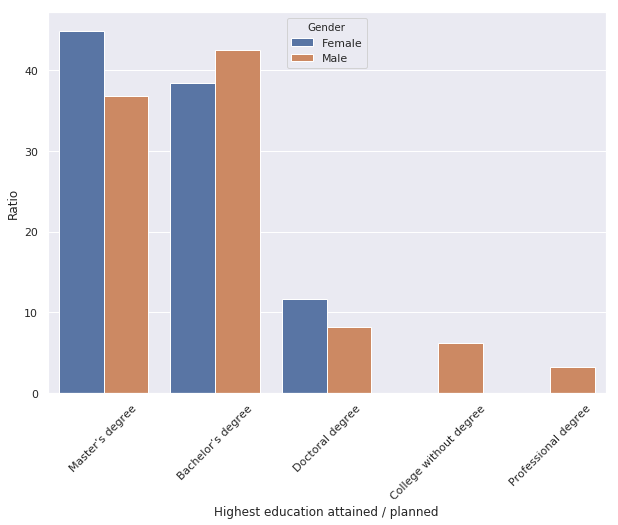

In [5]:
tmp = df_afr[df_afr.Q1.isin(['Male','Female'])]

education_gender = (tmp.groupby(['Q1'])['Q4']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
education_gender.Q4.replace(to_replace={"Some college/university study without earning a bachelor’s degree":"College without degree"}, 
                     inplace=True)
education_gender.rename(columns={"Q4": "Highest education attained / planned", 
                                "Q1" : "Gender"}, inplace=True)

plt.figure(figsize=(10,7))

p = sns.barplot(x="Highest education attained / planned", y="Ratio", hue="Gender", data=education_gender[:8])
_ = plt.setp(p.get_xticklabels(), rotation=45)

#  + anecdote cissé sur le ratio hommes / femmes 

It seems that women tend to go for the Master's / PhD more often than men. This could be because one of the following, or a bit of each : 
1. The male is still considered as the provider in many countries in Africa. So the "urgency" of working is a little bit more present for the male.
2. Gender discrimination when it comes to getting the job might make a woman feel like she has to get a Master's to get a job that a man could get with a bachelor.

## How do Africans learn ML ? 
<a id="online"></a>

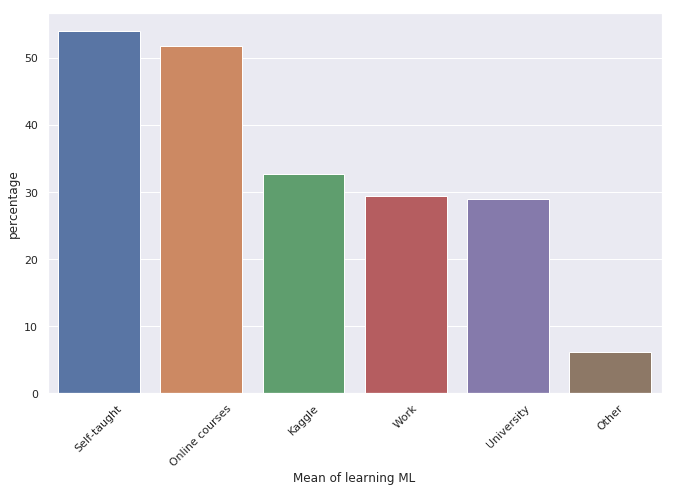

In [6]:
tmp ={
    'Self-taught' : (df_afr['Q35_Part_1'].astype(float)>0).sum(),
    'Online courses' : (df_afr['Q35_Part_2'].astype(float)>0).sum(),
    'Work' : (df_afr['Q35_Part_3'].astype(float)>0).sum(),
    'University' : (df_afr['Q35_Part_4'].astype(float)>0).sum(),
    'Kaggle' : (df_afr['Q35_Part_5'].astype(float)>0).sum(),
    'Other' : (df_afr['Q35_Part_6'].astype(float)>0).sum()
}


tmp = round(100*pd.DataFrame.from_dict(tmp, orient='index')/len(df_afr),2)
tmp.reset_index(inplace=True)
tmp.rename(columns={"index": "Mean of learning ML", 0 : "percentage"}, inplace=True)
tmp.sort_values(by='percentage', ascending=False, inplace=True)

plt.figure(figsize=(11,7))
p = sns.barplot(x="Mean of learning ML", y="percentage", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=45)

Bear in mind that in this question, respondents could have multiple choices (so probably a lot of people that checked self-taught also checked online courses).        
More than half the respondents consider themself to be self-taught while only 30% consider that University played a role in their teaching. That's not surprising since many universities in Africa are just starting to include ML courses in their curriculum. 

Which platforms are mainly used for online learning ? 

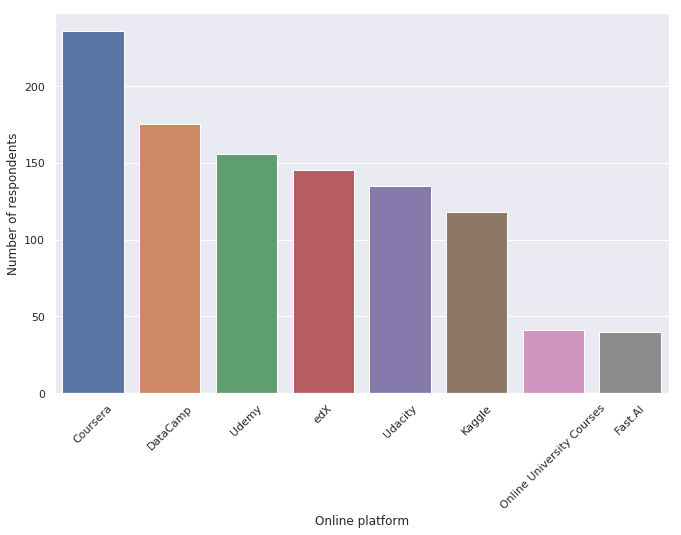

In [7]:
tmp = {
    'Coursera' : (df_afr['Q36_Part_2'].count()),
    'Udemy' : (df_afr['Q36_Part_9'].count()),
    'DataCamp' : (df_afr['Q36_Part_4'].count()),
    'Kaggle' : (df_afr['Q36_Part_6'].count()),
    'Udacity' : (df_afr['Q36_Part_1'].count()),
    'edX' : (df_afr['Q36_Part_3'].count()),
    'Online University Courses' : (df_afr['Q36_Part_11'].count()),
    'Fast.AI' : (df_afr['Q36_Part_7'].count()),
}


tmp = pd.DataFrame.from_dict(tmp, orient='index')
tmp.reset_index(inplace=True)
tmp.rename(columns={"index": "Online platform", 0 : "Number of respondents"}, inplace=True)
tmp.sort_values(by='Number of respondents', ascending=False, inplace=True)

plt.figure(figsize=(11,7))
p = sns.barplot(x="Online platform", y="Number of respondents", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=45)

Coursera comes first, as expected. Many other platforms are starting to put together great resources for ML and AI and it shows on the graph : there's no monopoly when it comes to the platforms.

What about how efficient those platforms are compared to university ? Let's check for students from Africa and the rest of the world.

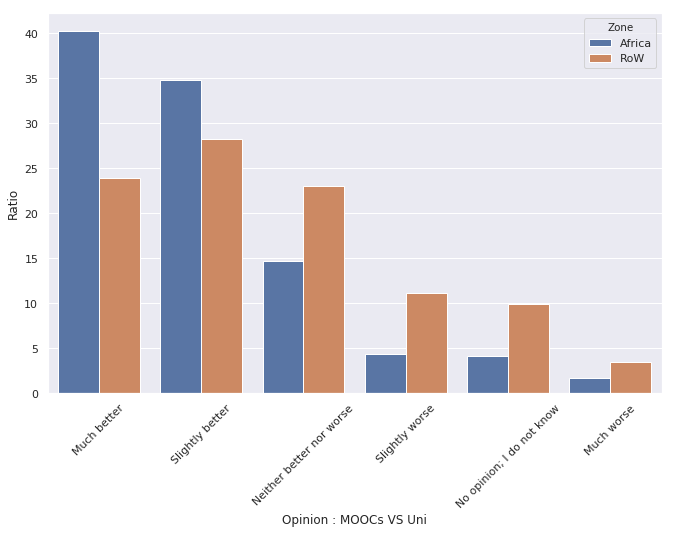

In [8]:
education_gender = (df.groupby(['Zone'])['Q39_Part_1']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))

education_gender.rename(columns={"Q39_Part_1": "Opinion : MOOCs VS Uni"}, inplace=True)

plt.figure(figsize=(11,7))

p = sns.barplot(x="Opinion : MOOCs VS Uni", y="Ratio", hue="Zone", data=education_gender[:-1])
_ = plt.setp(p.get_xticklabels(), rotation=45)

This plot is interesting and it actually shows how important those online courses have been for African students and how big was/is their role in democratizing AI.

Indeed, more than 75% of african respondents find that online courses are either slightly better or much better than what they get in universities. On the other hand, only 50% respondents from the rest of the world share that opinion. In other words, the online courses are providing a much needed content to students from countries that either can't study ML at their schools or have courses that aren't that good.

Actually, I'd like to share with you a success story for an african student that was shared by Jeremy Howard, Founding Researcher at fast.ai. and past president of Kaggle : 

In [9]:
s = ("""<blockquote class="twitter-tweet" data-lang="fr"><p lang="en" dir="ltr">Wonderful to hear these testimonials that show the impact on African deep learning of <a href="https://twitter.com/DeepIndaba?ref_src=twsrc%5Etfw">@DeepIndaba</a> , <a href="https://twitter.com/black_in_ai?ref_src=twsrc%5Etfw">@black_in_ai</a> , and <a href="https://twitter.com/fastdotai?ref_src=twsrc%5Etfw">@fastdotai</a> . Just 2 years ago our African students told us there was no community in most countries at all! <a href="https://t.co/eCmHnMxYgD">pic.twitter.com/eCmHnMxYgD</a></p>&mdash; Jeremy Howard (@jeremyphoward) <a href="https://twitter.com/jeremyphoward/status/1054015751940521985?ref_src=twsrc%5Etfw">21 octobre 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

And believe me when I say this : many, many africans have similar stories to this one above and it's been amazing to see the efforts that are being made from the AI community to build a diverse and inclusive environment where anyone that puts in the workd could thrive.

I stated before that many universities in Africa still don't include ML in their teaching. I also discussed that quality of teaching can also be a concern sometimes. This is changing now, and part of that is because of the newly founded masters AMMI, let's talk about that.

## AMMI :  African Master of Machine Intelligence
<a id="ammi"></a>

AMMI is a one-year intensive Master’s program that will provide brilliant young Africans with state-of-the-art training in machine learning and its applications. AMMI will open the doors to doing world-class research and to building new technologies. Every course on AMMI will be lectured by leading experts, from prestigious international institutions.

In the long term, AMMI graduates are expected to make enormous contributions to their home countries and continent by delivering technological solutions which improve agriculture, education and healthcare and which boost industry, employment and economic growth.[4]

Let's have a quick look on the CONFIRMED list of lecturers :
Yoshua Bengio (MILA) -  Yann Lecun (FAIR/NYU) - Joelle Pineau (FAIR/McGill) - Timnit Gebru (MSR) - Moustapha Cisse (Google AI/AIMS)

Still not impressed ? Here's what Lecun thinks about AMMI : 

In [10]:
s = """<blockquote class="twitter-tweet" data-conversation="none" data-lang="fr"><p lang="en" dir="ltr">No other Master&#39;s program in the entire world has such an amazing line up of lecturers.</p>&mdash; Yann LeCun (@ylecun) <a href="https://twitter.com/ylecun/status/1025213542339948544?ref_src=twsrc%5Etfw">3 août 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
"""
Tweet(s)

What does it mean for Africa ? Well, we'll have a worldclass Masters in our continent which is very, very rare. This means that African students will no longer have only ONE choice which is to go to Europe or the US (which mind you is not something any African can afford, even given scolarships) and it could turn out to be game changing in a very near future.

# 3. ML at work in Africa
<a id="work"></a>
***

We've seen AI in Africa from a student perspective. Let's move on to a professionnal perspective : How long have people been using ML in Africa ? Is ML put into production ? In what industries are respondents to this survey working ?

## Years of experience in ML : User / Office
<a id="experience"></a>

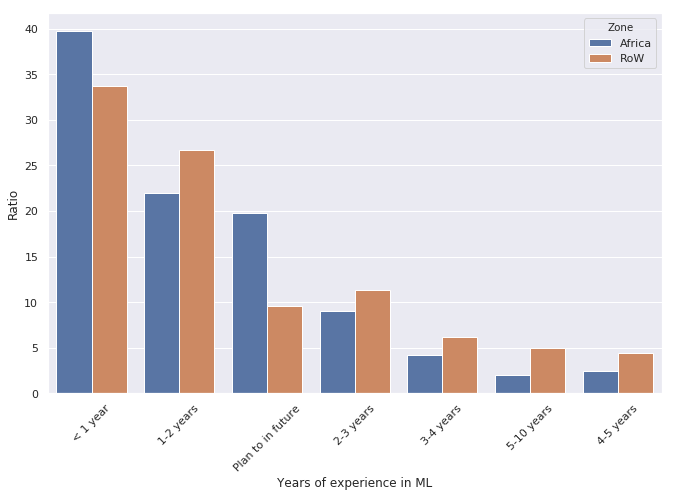

In [11]:
use_ml = (df.groupby(['Zone'])['Q25']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))


use_ml.Q25.replace(to_replace={"I have never studied machine learning but plan to learn in the future":"Plan to in future"}, 
                     inplace=True)
use_ml.rename(columns={"Q25": "Years of experience in ML"}, inplace=True)



plt.figure(figsize=(11,7))
p = sns.barplot(x="Years of experience in ML", y="Ratio", hue="Zone", data=use_ml[:14])
_ = plt.setp(p.get_xticklabels(), rotation=45)

# df_afr.Q25.value_counts()

Here each respondent is asked for how long he's been using ML. The trend in Africa and the rest of the world is similar (highest percentage in < 2 years).  That being said, respondents from Africa seem to be even newer to ML, as seen in the plot.

Let's see what happens when we go to the workplace : 

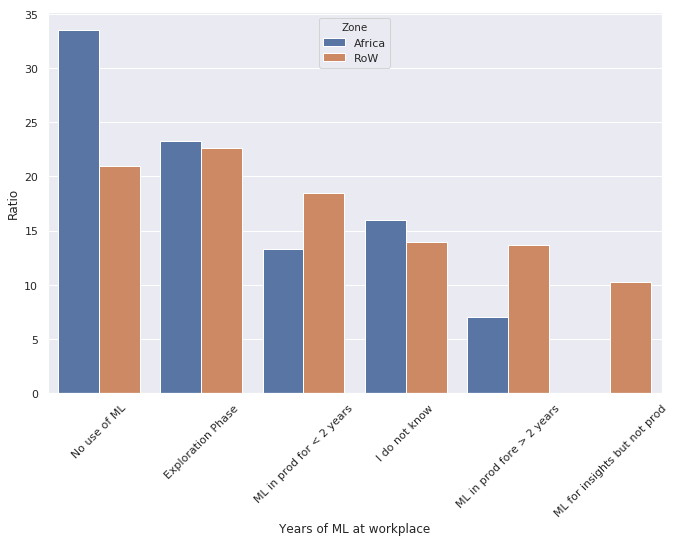

In [12]:
ml_work = (df.groupby(['Zone'])['Q10']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))


ml_work.Q10.replace(to_replace={"We are exploring ML methods (and may one day put a model into production)":"Exploration Phase",
                               "No (we do not use ML methods)" : "No use of ML",
                               "We recently started using ML methods (i.e., models in production for less than 2 years)":"ML in prod for < 2 years",
                               "We have well established ML methods (i.e., models in production for more than 2 years)":"ML in prod fore > 2 years",
                               "We use ML methods for generating insights (but do not put working models into production)":"ML for insights but not prod"
                               }, 
                     inplace=True)
ml_work.rename(columns={"Q10": "Years of ML at workplace"}, inplace=True)

plt.figure(figsize=(11,7))
p = sns.barplot(x="Years of ML at workplace", y="Ratio", hue="Zone", data=ml_work[:-2])
_ = plt.setp(p.get_xticklabels(), rotation=45)


We can notice that ML at work in Africa still hasn't matured. In terms of numbers, only ~ 22% of respondents say that their workplace has been putting ML algorithms in production and more than 30% don't use / plan to use ML in the foreseable future.

## Working Industry
<a id="industry"></a>

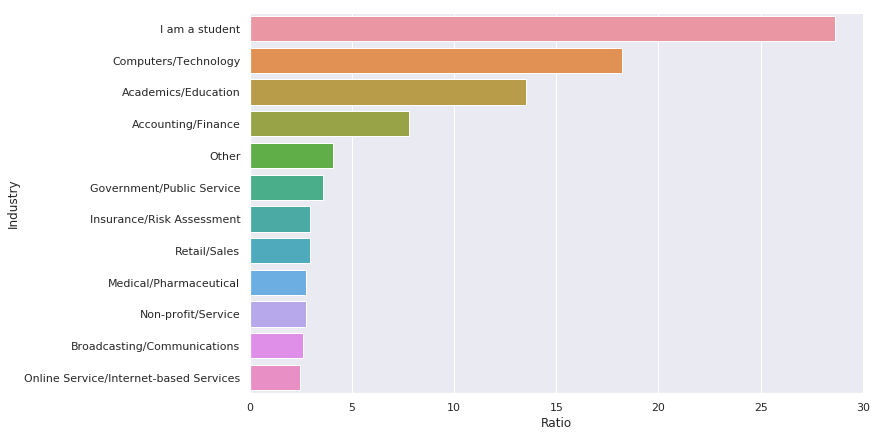

In [13]:
industry = (df.groupby(['Zone'])['Q7']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
industry.rename(columns={"Q7": "Industry"}, inplace=True)

industry = industry[industry.Zone=="Africa"]
plt.figure(figsize=(11,7))

p = sns.barplot(y="Industry", x="Ratio", data=industry[:12])

Most respondents haven't started working yet. The others work mainly in tech or education/academia.     

I would like to focus on that small fraction that's categorized under "Non-profit/Service". It's only 2.7%, granted. It's still 3 times the value found in the rest of the world (0.8%). In fact, more and more "AI for good" projects are taking place in Africa because there's an increasing sense of urgency when thinking about the effect that AI/ML can actually have regarding the problems facing Africa.

Examples of such work include : 
* Delta Analytics, provides talks and live teaching classes in different countries (among other activies such as consulting to NGOs) [5].
* AI Saturday Lagos, provides a weekly meetup community that gathers to learn, follow fast.ai courses, organize ML hackathons ...

## Google AI, Accra
<a id="google"></a>


![google](https://www.newsghana.com.gh/wp-content/uploads/2016/01/google-1.jpg)

This year, alongwith the opening of the new Master in Rwanda, a Google AI research center in Africa is opening in Accra, Ghana. This research lab will allow Google to have more collaboration with local universities, explore potential uses of AI in Africa and solve challenges in areas such as healthcare, agriculture, and education.[6]

Needless to say that this too, has been huge news. There isn't that many worldclass research labs in Africa, especially in AI. IBM has a couple and now, google joined them. This will help increase representation of the African community in research and in tech in general.

# Conclusion
<a id="conclusion"></a>
*** 

This is maybe the most important part of my notebook, so I hope you're still not bored ! 

In this notebook, I wanted to show that the future of AI in Africa seems bright. Indeed, unlike past technological revolutions, mutiple efforts are being done to ensure that Africa can thrive : from companies sponsoring events such as Deep Learning Indaba to opening research labs in Africa. In fact, even the most important ML-related conferences will be happening in Africa in the next few years. **Indeed, ICLR, a major AI conference, will take place in Addis, Ethiopia, in 2020 !**[11]    
It's also necessary to recognize the work of a handful of people who worked extremely hard to get to this point, to name a few : 
*  **Moustapha Cissé**, that I've mentionned before, used his position to push for the Google AI Lab in Accra (which he'll lead) and founded the AMMI.
* **Rediet Abebe and Timnit Gebry** founded the 'Black in AI' group that aims to increase increase the presence of Black people in the field of Artificial Intelligence and the work they've been doing is HUGE, to name a few :  financial assistance for members who want to attend conferences, mentoring for students who are applying for graduate programs. 
* One could also cite **Yoshua Bengio** and the founders of fast.ai, **Jeremy Howard and Rachel Thomas**, who have been using their platform and their voice to encourage diversity and explain why it's not a bonus but a necessity. 

All of that being said, everything is not perfect. Let's take this survey for example : Less than 5% of the respondents are actually from Africa. That's far too few. As many of you may know, NeurIPS is taking place in Montreal this week. **Guess how many African scientists, members of the black in AI group, have been denied a Visa to Canada ? Half of them**. Yes, that's a crazy number... PhD students in Oxford and even research scientists from Google didn't get a Visa on time. This goes on to show how difficult it can be for an African scientist to thrive and present their work, for absolutely no other reason than pure racial profiling.[12]          
Lack of diversity and representation can also cause AI to be racist/sexist as shown in many research papers (example of facial recognition algorithms algorithms which are less accurate when it comes to black people)[7,8].  If teams that set research directions and write algorithms or are made up of individuals from similar backgrounds and experiences, then we will end up with research that is to the benefit of a similarly narrow and already privileged subset of society [9].
Establishing a diverse and inclusive environment will take time and efforts for any and each one of us. The first step is to encourage AI education and incentivize entrepreneurship in the AI sector across the continent [10].

To conclude, I'd like to send one last message to fellow students from minorities that 

When attending an event where you can meet and talk with African scientists that made it to the top, such as Deep Learning Indaba,  it gives you a much needed confidence boost. I'll share an anecdote that marked me : I had a long exchange with [Nando de Freitas](https://en.wikipedia.org/wiki/Nando_de_Freitas) on the closing night as I was trying to get some advices from him, at one point he said : "When I was your age, I was doing my masters at University of the Witwatersrand (South Africa) and a couple of mathematicians were coming from Imperial College to our university. I was like *Oh wow those people are unbelieavble, I can't even talk to them at my level*  and then I went to one of them and started discussing an idea that was in one of his papers. At that specific point, I realized that it was all in my head, there was no reason for me to feel inferior because I'm not."      
Being part of an underrepresented minority / coming from a country without world class universities, the lack in confidence is quite natural. But at the end of that week, everyone was pumped and motivated because literally every lecturer's/guest's message was **"I've been in the exact same spot. I felt that I won't be admitted to that PhD. I won't be admitted to that Internship and yet, here I am. If you work hard enough, if you put in the work there's no reason for you not to reach your goal, no matter your race or your country"**. I know this might sound very cliché, but it was very effective because indeed, every one of them went through it.

I hope that this hybrid  blog post/notebook will be helpful to people in any way.

[Masakhane !](https://www.wordnik.com/words/Masakhane)

# References : 
<a id="references"></a>
***

[1] List of posters that have been presented during the event : http://www.deeplearningindaba.com/poster-sessions.html

[2] Open letter to the organizers and review of the event : https://blog.usejournal.com/an-open-letter-to-the-deep-learning-indaba-team-2723ec0ae0a8 + https://medium.com/@victor.dibia/6-reasons-i-loved-the-2018-deep-learning-indaba-e01d0ff5009                    

[3] Twitter exchange between Moustapha Cissé and Kyunghyun Cho about demographics : https://twitter.com/Moustapha_6C/status/1039534695279673351  

[4] Introduction the African Master’s of Machine Intelligence : https://medium.com/@moustaphacisse/introducing-the-african-masters-of-machine-intelligence-at-aims-9441b4346a55

[5] Delta Analytics initiative in Morocco : https://twitter.com/sarahookr/status/1066833624962453504

[6] Google's statement about opening a lab in Africa : https://www.blog.google/around-the-globe/google-africa/google-ai-ghan 

[7] Bias in facial recognition : http://gendershades.org/overview.html

[8] Ted talk by Timnit Gebru about algorithm bias and its dangers : https://www.youtube.com/watch?v=PWCtoVt1CJM

[9] AI needs to reflect society : https://www.forbes.com/sites/insights-intelai/2018/11/29/why-ai-needs-to-reflect-society/

[10] Measures to take in Africa : https://www.nature.com/articles/d41586-018-07104-7

[11] Y.Bengio announcing that ICLR will be in Ethiopia : https://www.technologyreview.com/s/612434/one-of-the-fathers-of-ai-is-worried-about-its-future/

[12] Africans being denied a Visa to Canada for NeurIPS : https://www.bloomberg.com/news/articles/2018-11-30/visa-issues-cast-shadow-on-canada-s-moment-in-the-ai-spotlight